In [1]:
#Importings
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
%matplotlib inline

In [2]:
#Sett up and show dataframe
df = pd.read_csv("NAS.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2003-12-18,19.482599,19.596901,19.025499,19.139799,19.139799,4978496.0
1,2003-12-19,19.368299,19.425501,18.282801,18.454201,18.454201,1410901.0
2,2003-12-22,18.739901,18.739901,17.997101,18.054300,18.054300,137047.0
3,2003-12-23,17.997101,17.997101,17.368700,17.425800,17.425800,229418.0
4,2003-12-24,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
4248,2020-10-12,0.709000,0.710000,0.650000,0.676800,0.676800,48320475.0
4249,2020-10-13,0.676800,0.676800,0.600000,0.600600,0.600600,47786200.0
4250,2020-10-14,0.601000,0.640000,0.596200,0.626000,0.626000,37534949.0
4251,2020-10-15,0.626000,0.626000,0.585000,0.605000,0.605000,26737615.0


In [3]:
#Setts the "Date" parameter to typeformat="%Y-%m-%d" date time
#Sets the date as the index parameter
df["Date"] = pd.to_datetime(df.Date,format="%Y-%m-%d")
#We make date time numeric so that we can scale the data later
df["Date"] = pd.to_numeric(df.Date, downcast="integer")
#df.index = df["Date"]
#df.index
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1071705600000000000,19.482599,19.596901,19.025499,19.139799,19.139799,4978496.0
1,1071792000000000000,19.368299,19.425501,18.282801,18.454201,18.454201,1410901.0
2,1072051200000000000,18.739901,18.739901,17.997101,18.054300,18.054300,137047.0
3,1072137600000000000,17.997101,17.997101,17.368700,17.425800,17.425800,229418.0
4,1072224000000000000,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
4248,1602460800000000000,0.709000,0.710000,0.650000,0.676800,0.676800,48320475.0
4249,1602547200000000000,0.676800,0.676800,0.600000,0.600600,0.600600,47786200.0
4250,1602633600000000000,0.601000,0.640000,0.596200,0.626000,0.626000,37534949.0
4251,1602720000000000000,0.626000,0.626000,0.585000,0.605000,0.605000,26737615.0


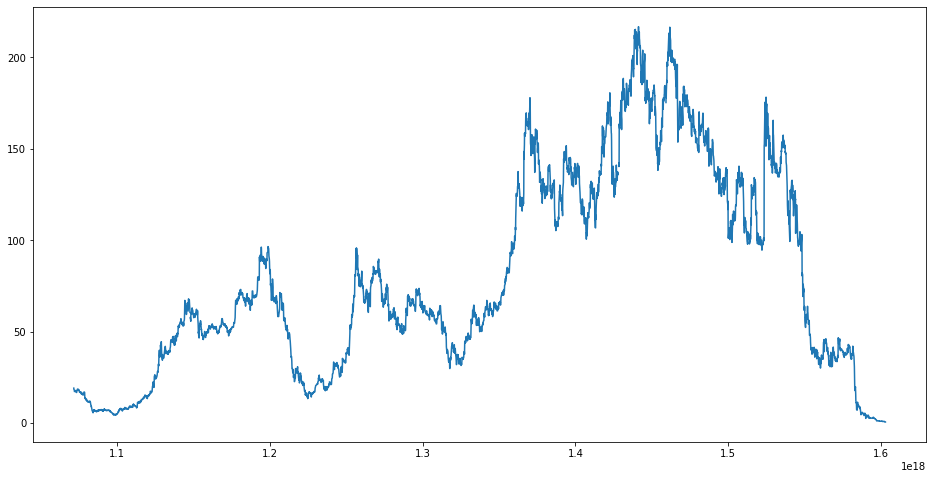

In [13]:
#plot
plt.figure(figsize=(16,8))
plt.plot(df["Date"],df["Close"], label="Close Price history")

In [5]:
#Clean the data a bit
df.drop_duplicates() #

#We are only interested in date and close value
#df_temp = df.drop(["Open", "High", "Low", "Adj Close", "Volume"], axis = 1)

#Remove the 10th and 90th percentiles
low_thresh = df["Close"].quantile(0.01)
high_thresh = df["Close"].quantile(0.99)
df2= df[(df["Close"]<high_thresh)
                          &(df["Close"]>low_thresh)]
df2

,Date,Open,High,Low,Close,Adj Close,Volume
0,1071705600000000000,19.482599,19.596901,19.025499,19.139799,19.139799,4978496.0
1,1071792000000000000,19.368299,19.425501,18.282801,18.454201,18.454201,1410901.0
2,1072051200000000000,18.739901,18.739901,17.997101,18.054300,18.054300,137047.0
3,1072137600000000000,17.997101,17.997101,17.368700,17.425800,17.425800,229418.0
7,1072656000000000000,17.425800,17.425800,16.854500,17.254400,17.254400,196206.0
...,...,...,...,...,...,...,...
4204,1597104000000000000,1.347500,1.506000,1.347000,1.399500,1.399500,89482178.0
4205,1597190400000000000,1.450000,1.486000,1.400000,1.440000,1.440000,49840531.0
4206,1597276800000000000,1.463500,1.466000,1.290000,1.320000,1.320000,55693758.0
4208,1597622400000000000,1.269500,1.375500,1.263000,1.367500,1.367500,25817961.0


In [6]:
#Separate dataset as reponce variable and feature variables
X = df2.drop(["Close", "Open", "High", "Low", "Adj Close", "Volume"], axis = 1)
y = df2["Close"]

In [9]:
linReg = linear_model.LinearRegression()
linReg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
linReg.predict([[1597104000000000000]])

array([128.49306669])

ValueError: Expected 2D array, got 1D array instead:
array=[19.139799 18.454201 18.0543   ...  1.32      1.3675    1.3     ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

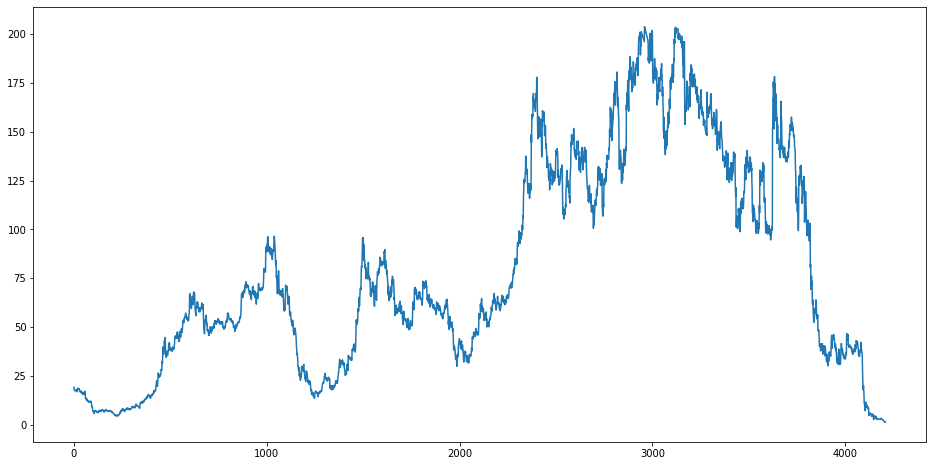

In [16]:
#Visualisation of the model
plt.figure(figsize=(16,8))
plt.plot(df2["Close"], label="Close Price history")
plt.plot(df2["Date"],linReg.predict(y))

In [12]:
#An at making a single date into a similar int value as in the pandas library
def date_to_int64(d, m, y):
    s = str(y)+"-"+str(m)+"-"+str(d)
    t = dt.datetime(s)
    return t.astype(np.int64)

date_to_int64(16,10,2020)

TypeError: an integer is required (got type str)

In [ ]:
linReg.predict([[1597190400000000000]])